# Ejercicio 2: Clasificación binaria con datos desbalanceados usando dataset médico

Consigna: 

- Implementar KNN
- Implementar regresión logística
- Implementar redes neuronales

Para cada modelo:
- Implementar técnicas de resampling (undersampling, oversampling, re-weighting y re-sampling con SMOTE)
- Computar matriz de confusión, curva ROC y AUC del modelo final.

## 1. Dataset

En 1948 en Framingham, un pequeño pueblo en Massachusetts, Estados Unidos, comenzó uno de los estudios médicos más famosos de la historia y que aun continua vigente. El estudio, conocido también como Framingham Heart Study, consistió en la participación voluntaria de 3 generaciones de habitantes del pueblo, quienes fueron sometidos a estudios médicos regulares cada 3 a 5 años, generando un gran volumen de datos sobre la salud mental y física, especialmente de enfermedades cardiovasculares de todos los involucrados.

Los aportes de este estudio son numerosos, entre los cuales se destacan las relaciones entre el riesgo de tener una enfermedad cardíaca con varios aspectos de la vida cotidiana y del estado de salud general de las personas, tales como la presión sanguínea, los niveles de colesterol, el consumo de cigarrillos y factores psico-sociales. El término "factor de riesgo" fue acuñado como parte de los hallazgos de este estudio. 
Para más información sobre el estudio se puede ingresar a su sitio web https://framinghamheartstudy.org/.
El dataset puede ser descargado de https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

En esta práctica trabajaremos con un extracto del dataset resultante del estudio, en el que se cuenta con información médica de varios participantes, entre la que se encuentra el riesgo de que esa persona tenga una enfermedad coronaria durante los próximos 10 años. 

Nos propondremos entrenar un regresor logístico, KNN y redes neuronales que permitan clasificar y identificar los pacientes en riesgo de tener este tipo de enfermedad basándonos en sus datos clínicos.

El dataset cuenta con las siguientes variables:
- age: Edad.
- male: Género.
- education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- currentSmoker: Si la persona fuma o no
- cigsPerDay: la cantidad de cigarrillos que la persona fuma por día en promedio.
- BPMeds: si la persona consume medicación para la presión sanguínea.
- prevalentStroke: Si la persona tuvo un infarto anteriormente.
- prevalentHyp: si la persona tiene hipertensión.
- diabetes: si la persona tuvo diabetes.
- totChol: nivel de colesterol total.
- sysBP: presión sanguínea sistólica.
- diaBP: presión sanguínea diastólica.
- BMI: índice de masa corporal.
- heartRate: frecuencia cardíaca.
- glucose: nivel de glucosa en sangre.
- TenYearCHD: si la persona está en riesgo de tener una enfermedad coronaria dentro de los próximos 10 años.

### EDA - Exploratory data analysis
Importar el dataset y realizar un análisis exploratorio del mismo. 
- ¿Cuántos registros hay?
- ¿Qué tipo de variable es cada una?
- ¿Hay valores faltantes?
- ¿Hay valores fuera del rango esperado?
- ¿En qué tipo de dato están almacenados?
- ¿Todas las variables son médicas o hay otra información en el dataset?
- ¿Hay correlación entre las variables?
- ¿En qué rango está cada una?
- Cómo son las proporciones de las variables categóricas?

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Data/framingham.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df.isna().any(axis=1).sum()

Hay 4240 registros de los cuales 582 tienen valores faltantes

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18,12))
fig.suptitle('Normalized Histograms')

for c, ax in zip(df.columns[:-1], axes.flatten()):
    sns.histplot(data=df, x=c, hue='TenYearCHD', ax=ax, kde=False, stat='density', common_norm=False, multiple="stack")

    ax.legend(['TenYearCHD = 0', 'TenYearCHD = 1'])

plt.show()

In [ ]:
plt.figure(figsize=(8,12))
sns.heatmap(df.corr()[['TenYearCHD']], annot=True)

## 2. Separo el dataset en dev set y test para que los chicos solo usen el dev.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and the target variable (y)
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Splitting the dataset into train and test sets with 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Concatenating features and labels for both train and test sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Saving the train and test sets to CSV files
train_data.to_csv('farmingham_train.csv', index=False)
test_data.to_csv('farmingham_test.csv', index=False)


START RUNNING HERE!

In [2]:
df_train = pd.read_csv('Data/farmingham_train.csv')
df_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,50,4.0,1,9.0,NaN,0,0,0,296.0,119.0,90.0,23.55,75.0,69.0,1
1,0,51,1.0,0,0.0,0.0,0,1,0,225.0,155.0,92.5,23.84,72.0,63.0,0
2,0,47,3.0,0,0.0,0.0,0,0,0,205.0,106.0,75.0,23.44,75.0,97.0,0
3,1,51,4.0,1,10.0,0.0,0,1,0,269.0,134.0,92.0,30.39,85.0,81.0,0
4,1,35,2.0,0,0.0,0.0,0,0,0,242.0,136.5,95.0,24.43,75.0,88.0,0


In [3]:
df_train.shape

(3816, 16)

In [ ]:
df_test = pd.read_csv('Data/farmingham_test.csv')
df_test.head()

In [ ]:
df_test.shape

In [4]:
df_train.isna().sum()

male                 0
age                  0
education           97
currentSmoker        0
cigsPerDay          25
BPMeds              47
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             43
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            355
TenYearCHD           0
dtype: int64

In [ ]:
df_test.isna().sum()

In [5]:
df_train.isna().any(axis=1).sum()

532

In [6]:
print(f"Hay 3816 registros en el set de train, de los cuales 532 tienen valores faltantes. \nEsto representa: {532/3816*100:.2f}%")

Hay 3816 registros en el set de train, de los cuales 532 tienen valores faltantes. 
Esto representa: 13.94%


In [ ]:
df_test.isna().any(axis=1).sum()

Hay 424 registros en el set de test, de los cuales 50 tienen valores faltantes

In [7]:
df_train.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3816.000000,3816.000000,3719.000000,3816.000000,3791.000000,3769.000000,3816.000000,3816.000000,3816.000000,3773.000000,3816.000000,3816.000000,3797.000000,3815.000000,3461.000000,3816.000000
mean,0.428721,49.587264,1.978489,0.492662,9.003693,0.029185,0.006551,0.310535,0.026205,236.681686,132.298087,82.850891,25.805810,75.888073,81.938746,0.151992
std,0.494958,8.579089,1.023432,0.500012,11.935578,0.168348,0.080685,0.462773,0.159767,44.676790,22.002283,11.922562,4.093679,11.969254,23.592880,0.359060
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.060000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df_test.describe()

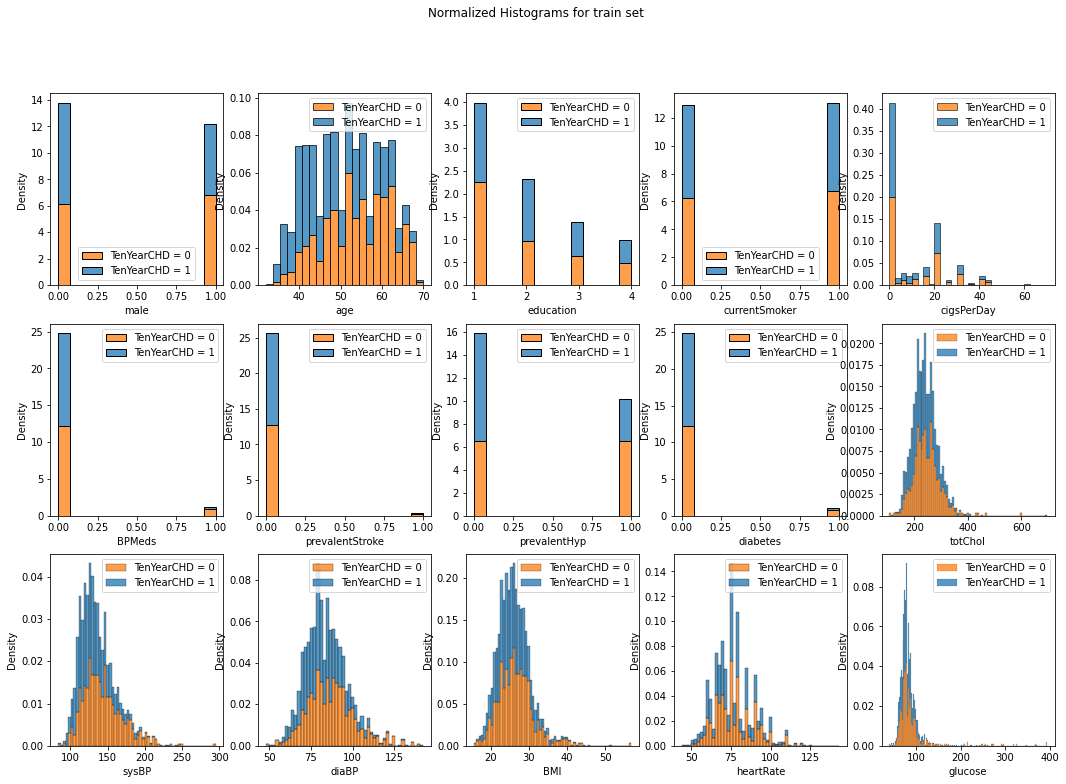

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18,12))
fig.suptitle('Normalized Histograms for train set')

for c, ax in zip(df_train.columns[:-1], axes.flatten()):
    sns.histplot(data=df_train, x=c, hue='TenYearCHD', ax=ax, kde=False, stat='density', common_norm=False, multiple="stack")

    ax.legend(['TenYearCHD = 0', 'TenYearCHD = 1'])

plt.show()

<Axes: >

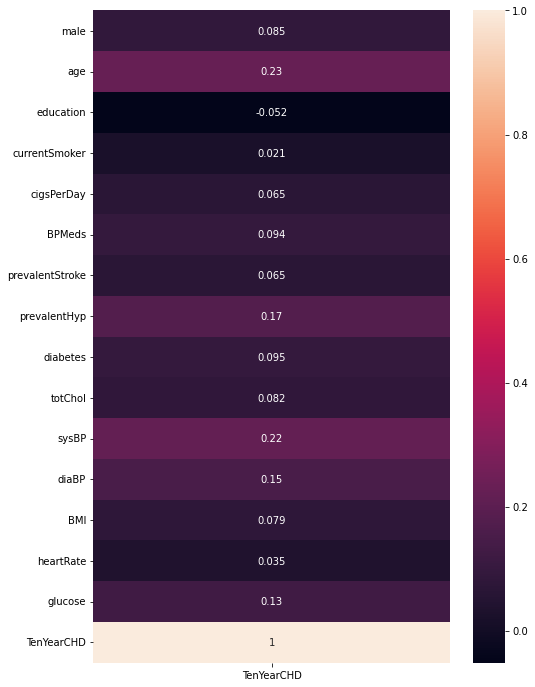

In [12]:
plt.figure(figsize=(8,12))
sns.heatmap(df_train.corr()[['TenYearCHD']], annot=True)

In [13]:
# Eliminamos los registros con valores faltantes ya que son sólo un 13% del dataset
df_train.dropna(inplace=True)

In [14]:
# Preparamos la matriz de features y el vector objetivo
X = df_train.drop(columns=['TenYearCHD'])
y = df_train['TenYearCHD']

In [15]:
# Separamos un set de valid para evaluar el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [16]:
# Verificamos que coincidan las proporciones del target
y_train.mean(), y_test.mean()

(0.15306536743808363, 0.15225334957369063)

## 2. Regresión Logistica

Ahora utilizaremos una regresión logística como clasificador de personas y el objetivo será etiquetar a aquellas que tengan riesgo de padecer una enfermedad coronaria en los próximos 10 años.

In [ ]:
# Estandarizamos los datos para que la regularización sea correcta
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

**1. Calcular el accuracy**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_train, lr.predict(X_train_std))

**2. Graficar la matríz de confusión**

In [ ]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

**3. ¿Que conclusiones tiene de este performance?**

Observamos que hay una accuracy del 85%, pero que de los 377 casos positivos, sólo 36 (9.5%) están siendo detectados. Esto implica que nuestro clasificador le está diciendo a mucha gente que está fuera de peligro cuando en realidad no es así. Intentemos modificar el modelo para mejorar la predicción en estos casos.

Vamos a crear una función que genera el modelo para poder llamarla facilmente con los datasets resampled:

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay,roc_auc_score, classification_report, precision_recall_curve, auc

def logistic_regression_report(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()  
    X_train_sc = scaler.fit_transform(X_train)     
    X_test_sc = scaler.transform(X_test)
        
    model = LogisticRegressionCV(scoring='f1')
    
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    y_proba = model.predict_proba(X_test_sc)
    
    print(classification_report(y_test, y_pred))
    print('Area bajo la curva ROC:', np.round(roc_auc_score(y_test, y_proba[:, 1]), 4))
    
    precision, recall, threshold = precision_recall_curve(y_test, y_proba[:, 1])
    print('Area bajo la curva Precision-Recall:', np.round(auc(recall, precision), 4))
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
    
    return

In [ ]:
logistic_regression_report(X_train,X_test,y_train,y_test)

Los valores de precision y recall nos muestran que el modelo es bueno prediciendo la clase mayoritaria pero es muy malo para la clase minoritaria. 
Vamos a implementar tres posibles soluciones al problema del desbalance de clases:<b> Undersampling, Oversampling, Class weighting y SMOTE</b>

Para resamplear los datos utilizaremos la librería <b>imblearn</b>

**4. Implementar técnicas de resampling (undersampling, oversampling, re-weighting y re-sampling con SMOTE) para mejorar el modelo.**

**2.1 Undersampling**

Una estrategia posible es entrenar un modelo en un subset de datos con clases balanceadas, descartando casos de la clase mayoritaria. Para esto utilizaremos la clase RandomUnderSampler que samplea observaciones de la clase mayoritaria al azar, con o sin reposición.

El hiporparámetro **sampling_strategy** sirve para definir la estrategia de sampleo. La opción 'majority' seleccionará un número de muestras igual al de la clase minoritaria. También se puede pasar un valor numérico entre cero y uno que represnte el ratio entre la clase mayoritaria y la minoritaria.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(sampling_strategy='majority');

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

In [ ]:
logistic_regression_report(X_train_us, X_test, y_train_us, y_test)

Vemos que el modelo hace un mejor trabajo en reconocer la clase minoritaria, pero pierde capacidad predictiva de la clase mayoritaria.

**2.2 Oversampling**

Para aumentar la representación de la clase minoritaria vamos a hacer un oversampling. Una estrategia posible es usar la herramienta RandomOversampler, que funciona de manera análoga a RandomUndersampler. En este caso, el método consiste en samplear observaciones de la clase minoritaria con reposición.

El hiperparámetro **sampling_strategy** puede tomar los valores:

* 'minority': samplea hasta balancear las clases
* número entre 0 y 1: ratio entre las clases mayoritaria y minoritaria

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

In [ ]:
logistic_regression_report(X_train_os,X_test,y_train_os,y_test)

Es un mejor que el undersampling, pero las métricas siguen sin ser las ideales.

**2.3 SMOTE**

El algoritmo SMOTE (Synthetic Minority Oversample) ofrece otra estrategia de oversampling, generando muestras simuladas de la clase minoritaria.

Cuando las features son numéricas, el algoritmo funciona de este modo:

1. Se elige un punto al azar de la clase minoritaria.
2. Se elige al azar uno de los K vecinos más cercanos al punto elegido en 1.
3. Se calcula el vector que une los puntos elegidos en 1 y 2 y se lo multiplica por un número aleatorio entre 0 y 1.
4. El punto aleatorio definido en el paso 3 constituye una nueva observación de la clase minoritaria.

De este modo, el algoritmo genera datos ficticios vecinos a las observaciones de la clase minoritaria.


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5);
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train);

print('Composición del training set:')
print(y_train_sm.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

In [ ]:
logistic_regression_report(X_train_sm,X_test,y_train_sm,y_test)

**2.4 Class weighting**

Otra técnica que podemos utilizar para corregir el desbalance de los datos es incorporar en la función de costos del algoritmo un mayor peso para los errores de entrenamiento cometidos sobre los puntos de la clase minoritaria. 

La regresuón logística admite el argumento "class_weight" para ponderar la contribución a la función de costo de cada clase. Si usamos class_weight = 'balanced' los pesos asignados son la inversa de la frecuencia con que se observa cada clase.

In [ ]:
model = LogisticRegressionCV(class_weight = 'balanced')

scaler=StandardScaler()

X_train_sc=scaler.fit_transform(X_train);
X_test_sc=scaler.transform(X_test);

model.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)
pred_probas = model.predict_proba(X_test_sc);

In [ ]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

print('Area bajo la curva ROC:',roc_auc_score(y_test,pred_probas[:,1]))

precision, recall,threshold=precision_recall_curve(y_test,pred_probas[:,1]);

print('Area bajo la curva Precision-Recall:',auc(recall,precision))

## 3. KNN

Ahora utilizaremos un clasificador KNN con el objetivo será etiquetar a aquellas que tengan riesgo de padecer una enfermedad coronaria en los próximos 10 años.

Vamos a correr una primera prueba con la configuración de hiperparámetros por defecto.

In [17]:
# Importamos la clase KNeighborsClassifier de módulo neighbors
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Instanciamos el modelo con su configuración por defecto
knn = KNeighborsClassifier()

In [19]:
# Ajustamos a los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Predecimos etiquetas para los datos de test
y_pred = knn.predict(X_test)

In [21]:
# Evaluamos el accuracy del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred).round(2)

0.84

**Elegir el valor óptimo para el hiperparámetro `n_neighbors`**

Ahora vamos a entrenar varios modelos de `KNeighborsClassifier` probando distintos valores posibles para el hiperparámetro `n_neighbors` dentro de un esquema de *cross-validation*

In [22]:
# Vamos a querer graficar los distintos valores del score de cross validation
# en función del hiperparámetro n_neighbors. Para esto generamos una lista de
# diccionarios que después se puede convertir fácilmente en DataFrame.

# Probamos todos los enteros desde el 1 hasta el 20
# como posibles valores de n_neighbors a explorar.

# Definimos la estrategia de validación cruzada
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 26):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [23]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.head()

,score_medio,score_std,n_neighbors
0,0.768579,0.011906,1
1,0.834353,0.006870,2
2,0.818926,0.008908,3
3,0.839224,0.007571,4
4,0.828663,0.006134,5


Graficamos la búsqueda del mejor hiperparámetro

El valor de _scoring_ que utiliza por defecto `KNeighborsClassifier` es el accuracy, el porcentaje de casos bien clasificados. 

Una vez que tenemos la tabla con la _performance_ para cada valor del hiperparámetro, hacemos un gráfico con los valores obtenidos. Para darnos una idea de la dispersión, vamos a graficar también las líneas que indican un desvío estándar por encima y por debajo de la media. 

In [24]:
# Generamos los límites inferior y superior
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.head()

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
0,0.768579,0.011906,1,0.756673,0.780484
1,0.834353,0.006870,2,0.827484,0.841223
2,0.818926,0.008908,3,0.810018,0.827834
3,0.839224,0.007571,4,0.831653,0.846795
4,0.828663,0.006134,5,0.822529,0.834797


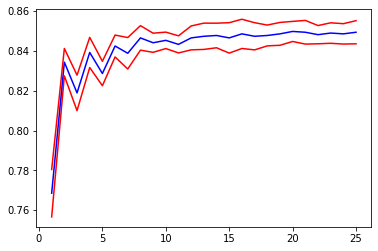

In [25]:
# Graficamos los resultados
plt.plot(df_scores['n_neighbors'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbors'], df_scores['limite_superior'], color='r');

In [26]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
19,0.84978,0.00504,20,0.84474,0.854819


Luego de la validación cruzada, identificamos que el valor de `n_neighbors` que maximiza el *score* promedio es 20.

In [27]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(), 'n_neighbors'].values[0]
best_k

20

In [28]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [29]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, model.predict(X_train)).round(2)

0.85

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       696
           1       0.50      0.01      0.02       125

    accuracy                           0.85       821
   macro avg       0.67      0.50      0.47       821
weighted avg       0.80      0.85      0.78       821

Area bajo la curva ROC: 0.6569885057471265
Area bajo la curva Precision-Recall: 0.2591368723689365


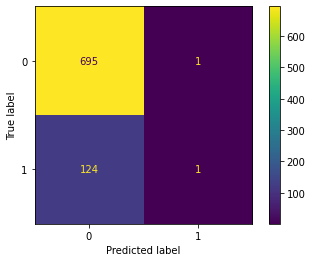

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve, auc

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

pred_probas = model.predict_proba(X_test); 

print('Area bajo la curva ROC:',roc_auc_score(y_test,pred_probas[:,1]))

precision, recall,threshold=precision_recall_curve(y_test,pred_probas[:,1]);

print('Area bajo la curva Precision-Recall:',auc(recall,precision))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       696
           1       0.50      0.01      0.02       125

    accuracy                           0.85       821
   macro avg       0.67      0.50      0.47       821
weighted avg       0.80      0.85      0.78       821

Area bajo la curva ROC: 0.657
Area bajo la curva Precision-Recall: 0.2591


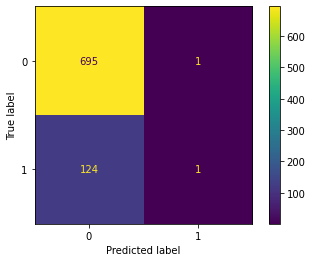

In [38]:
def knn_report(X_train, X_test, y_train, y_test, best_k):
        
    model = KNeighborsClassifier(n_neighbors=best_k)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    
    print(classification_report(y_test, y_pred))
    print('Area bajo la curva ROC:', np.round(roc_auc_score(y_test, y_proba[:, 1]), 4))
    
    precision, recall, threshold = precision_recall_curve(y_test, y_proba[:, 1])
    print('Area bajo la curva Precision-Recall:', np.round(auc(recall, precision), 4))
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
    
    return

knn_report(X_train, X_test, y_train, y_test, best_k)

**3.1 Undersampling**

In [40]:
from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(sampling_strategy='majority');

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
TenYearCHD
0    377
1    377
Name: count, dtype: int64

Composición del test set:
TenYearCHD
0    696
1    125
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.91      0.71      0.80       696
           1       0.27      0.60      0.37       125

    accuracy                           0.70       821
   macro avg       0.59      0.66      0.59       821
weighted avg       0.81      0.70      0.73       821

Area bajo la curva ROC: 0.6787
Area bajo la curva Precision-Recall: 0.2758


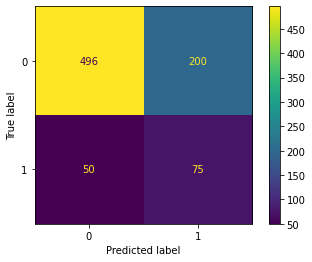

In [41]:
knn_report(X_train_us, X_test, y_train_us, y_test, best_k)

**3.2 Oversampling**

In [42]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
TenYearCHD
0    2086
1    2086
Name: count, dtype: int64

Composición del test set:
TenYearCHD
0    696
1    125
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.88      0.69      0.78       696
           1       0.22      0.48      0.30       125

    accuracy                           0.66       821
   macro avg       0.55      0.59      0.54       821
weighted avg       0.78      0.66      0.70       821

Area bajo la curva ROC: 0.6318
Area bajo la curva Precision-Recall: 0.2498


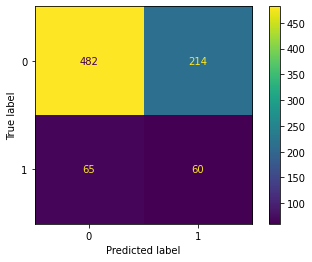

In [43]:
knn_report(X_train_os, X_test, y_train_os, y_test, best_k)

**3.3 SMOTE**

In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5);
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train);

print('Composición del training set:')
print(y_train_sm.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
TenYearCHD
0    2086
1    2086
Name: count, dtype: int64

Composición del test set:
TenYearCHD
0    696
1    125
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.89      0.63      0.74       696
           1       0.21      0.55      0.30       125

    accuracy                           0.62       821
   macro avg       0.55      0.59      0.52       821
weighted avg       0.78      0.62      0.67       821

Area bajo la curva ROC: 0.6128
Area bajo la curva Precision-Recall: 0.2287


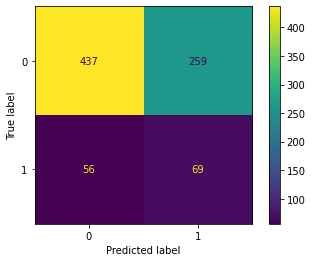

In [45]:
knn_report(X_train_sm, X_test, y_train_sm, y_test, best_k)

**3.4 Class weighting**

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       696
           1       0.42      0.13      0.20       125

    accuracy                           0.84       821
   macro avg       0.64      0.55      0.55       821
weighted avg       0.79      0.84      0.80       821

Area bajo la curva ROC: 0.5884
Area bajo la curva Precision-Recall: 0.2549


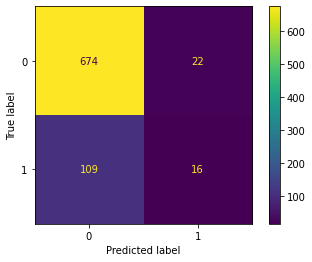

In [49]:
# Count the occurrences of each class label in y_train
class_counts = np.bincount(y_train)

# Calculate the total number of samples
total_samples = len(y_train)

# Calculate the class frequencies
class_frequencies = class_counts / total_samples

# Calculate the inverse of class frequencies to get class weights
class_weights = 1 / class_frequencies

# Normalize the class weights
class_weights /= np.mean(class_weights)

# Create a dictionary to store class weights
class_weights_dict = {class_label: weight for class_label, weight in enumerate(class_weights)}

# Instantiate the KNeighborsClassifier with class weighting
# Pass the class_weights dictionary to the class_weight parameter
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=None)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(classification_report(y_test, y_pred))
print('Area bajo la curva ROC:', np.round(roc_auc_score(y_test, y_proba[:, 1]), 4))

precision, recall, threshold = precision_recall_curve(y_test, y_proba[:, 1])
print('Area bajo la curva Precision-Recall:', np.round(auc(recall, precision), 4))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()


## 4. Redes Neuronales

Ahora implementaremos una MLP como clasificador binario con el objetivo de etiquetar a aquellas que tengan riesgo de padecer una enfermedad coronaria en los próximos 10 años.

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

def MLP_report(X_train, X_test, y_train, y_test):

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Instantiate the MLPClassifier
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(200, 100, 50 ), max_iter=500, random_state=42)

    # Train the classifier
    mlp_classifier.fit(X_train_std, y_train)

    # Make predictions on the test set
    y_pred = mlp_classifier.predict(X_test_std)
    y_proba = mlp_classifier.predict_proba(X_test_std)

    print(classification_report(y_test, y_pred))
    print('Area bajo la curva ROC:', np.round(roc_auc_score(y_test, y_proba[:, 1]), 4))
        
    precision, recall, threshold = precision_recall_curve(y_test, y_proba[:, 1])
    print('Area bajo la curva Precision-Recall:', np.round(auc(recall, precision), 4))

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_classifier.classes_).plot()

    return

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       696
           1       0.35      0.24      0.29       125

    accuracy                           0.82       821
   macro avg       0.61      0.58      0.59       821
weighted avg       0.79      0.82      0.80       821

Area bajo la curva ROC: 0.564
Area bajo la curva Precision-Recall: 0.2409


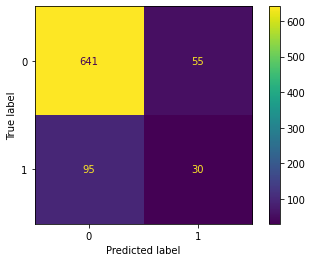

In [71]:
MLP_report(X_train, X_test, y_train, y_test)

**4.1 Undersampling**

In [72]:
from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(sampling_strategy='majority');

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
TenYearCHD
0    377
1    377
Name: count, dtype: int64

Composición del test set:
TenYearCHD
0    696
1    125
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.90      0.60      0.72       696
           1       0.22      0.62      0.32       125

    accuracy                           0.60       821
   macro avg       0.56      0.61      0.52       821
weighted avg       0.79      0.60      0.66       821

Area bajo la curva ROC: 0.6523
Area bajo la curva Precision-Recall: 0.2786


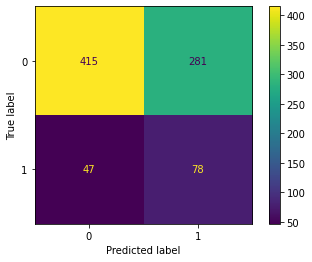

In [73]:
MLP_report(X_train_us, X_test, y_train_us, y_test)

**4.2 Oversampling**

In [74]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
TenYearCHD
0    2086
1    2086
Name: count, dtype: int64

Composición del test set:
TenYearCHD
0    696
1    125
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.87      0.90      0.88       696
           1       0.29      0.24      0.26       125

    accuracy                           0.80       821
   macro avg       0.58      0.57      0.57       821
weighted avg       0.78      0.80      0.79       821

Area bajo la curva ROC: 0.5831
Area bajo la curva Precision-Recall: 0.239


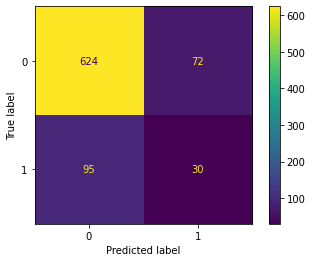

In [75]:
MLP_report(X_train_os,X_test,y_train_os,y_test)

**4.3 SMOTE**

In [76]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5);
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train);

print('Composición del training set:')
print(y_train_sm.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
TenYearCHD
0    2086
1    2086
Name: count, dtype: int64

Composición del test set:
TenYearCHD
0    696
1    125
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       696
           1       0.26      0.30      0.28       125

    accuracy                           0.77       821
   macro avg       0.57      0.57      0.57       821
weighted avg       0.78      0.77      0.77       821

Area bajo la curva ROC: 0.5829
Area bajo la curva Precision-Recall: 0.2377


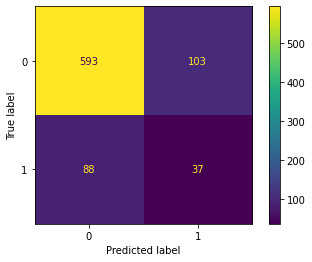

In [77]:
MLP_report(X_train_sm,X_test,y_train_sm,y_test)

**4.4 Class Weighting**

TODO: implementar a mano, en sklearn no se puede.